In [12]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import solve_ivp
from matplotlib import animation

In [13]:
#u[0]=x1 u[1] = y1 u[2] = x2 u[3]= y2 u[4]= v1x u[5]= v1y u[6]= v2x u[7] = v2y
def orbit(t,u): 
    f = np.zeros((8,))
    f[0] = u[4]
    f[1] = u[5]
    f[2] = u[6]
    f[3] = u[7]
    r1 = np.sqrt((u[0]**2 + u[1]**2))
    r2 = np.sqrt(u[2]**2 + u[3]**2)
    dx = u[0] - u[2]
    dy = u[1] - u[3]
    r12 = np.sqrt(dx**2 + dy**2)
    q1 = -g*ms/(r1**3)
    q2 = -g*ms/(r2**3)
    q12 = -g*mp2/(r12**3)
    q21 = -g*mp1/(r12**3)
    f[4] = q1*u[0] + q12*dx
    f[5] = q1*u[1] + q12*dy
    f[6] = q2*u[2] - q21*dx
    f[7] = q2*u[3] - q21*dy
    return f

In [14]:
g   = 6.67e-11 #m3 * kg-1 * s-2
ms  = 1.98e30 #kg
re  = 150e9 #km
mp1 =  ms * 0.001 #kg
mp2 =   mp1 #kg
rp1 = re 
rp2 = re*0.95
k = 4 * (np.pi**2)/(g * ms)
pp1 = np.sqrt(k * (rp1**3)) #s
pp2 = np.sqrt(k * (rp2**3)) #s
vp1 = (2*np.pi * rp1)/pp1
vp2 = (2*np.pi * rp2)/pp2

In [15]:
def show(solution):
    fig = plt.figure()
    ax = plt.subplot()
    ax.set_xlim((-3e8, 3e8))
    ax.set_ylim((-3e8, 3e8))
    ax.plot(solution.y[0]/1000, solution.y[1]/1000, 'g-')
    ax.plot(solution.y[2]/1000, solution.y[3]/1000, 'r-')
    ax.plot(0,0,'ko', lw=2)
    ax.set_xlabel('x (km)')
    ax.set_ylabel('y (km)')

    fig1 = plt.figure()
    ax1 = fig1.add_subplot(projection='3d')
    ax1.set_xlim((-3e8, 3e8))
    ax1.set_ylim((-3e8, 3e8))
    ax1.set_zlim((t0, tmax))
    ax1.plot(solution.y[0]/1000, solution.y[1]/1000, solution.t, 'g-') #planet 1
    ax1.plot(solution.y[2]/1000, solution.y[3]/1000, solution.t, 'r-') # planet 2
    ax1.set_xlabel('x position (km)')
    ax1.set_ylabel('y position (km)') 
    ax1.set_zlabel('time (s)')

    rad1 = np.sqrt(solution.y[0]**2 + solution.y[1]**2)
    rad2 = np.sqrt(solution.y[2]**2 + solution.y[3]**2)
    
    fig2 = plt.figure()
    ax2 = plt.subplot(1,1,1)
    ax2.set_xlim((t0, tmax))
    ax2.set_ylim((0, 3e8))
    ax2.plot(t,rad1/1000, 'g-')
    ax2.plot(t,rad2/1000, 'r-')
    ax2.set_xlabel('time (s)')
    ax2.set_ylabel('Orbital Radius, R (km)')
    
    delx = solution.y[0] - solution.y[2]
    dely = solution.y[1] - solution.y[3]
    
    rad12 = np.sqrt(delx**2 + dely**2)
    
    fig3 = plt.figure()
    ax3 = plt.subplot(1,1,1)
    ax3.set_xlim((t0, tmax))
    ax3.set_ylim((0, 3e8))
    ax3.plot(t,rad12/1000, 'g-')
    ax3.set_xlabel('time (s)')
    ax3.set_ylabel('Planetary distance, R12 (km)')

    velop1 = np.sqrt(solution.y[4]**2 + solution.y[5]**2)
    velop2 = np.sqrt(solution.y[6]**2 + solution.y[7]**2)
    
    fig4 = plt.figure()
    ax4 = plt.subplot(1,1,1)
    
    ax4.set_xlim([t0,tmax])
    ax4.plot(t,velop1, 'g-')
    ax4.plot(t,velop2, 'r-')
    
    ax4.set_xlabel('time (s)')
    ax4.set_ylabel('Planetary Velocity (m/s)')
    
Dt = 360
t0 = 0
tmax = 20*pp1
t = np.arange(t0,tmax,Dt)

## 1)

In [5]:
mp1 = ms * 0.001 #kg
mp2 = mp1 #kg
rp1 = re 
rp2 = re*0.95
pp1 = np.sqrt(k * (rp1**3)) #s
pp2 = np.sqrt(k * (rp2**3)) #s
vp1 = (2*np.pi * rp1)/pp1
vp2 = (2*np.pi * rp2)/pp2
case1 = np.zeros((8))
case1[0] = rp1 * np.cos(0.05 * np.pi/180)
case1[1] = rp1 * np.sin(0.05 * np.pi/180)
case1[2] = rp2 * np.cos(-0.05 * np.pi/180)
case1[3] = rp2 * np.sin(-0.05 * np.pi/180)
case1[4] = 0
case1[5] = vp1
case1[6] = 0
case1[7] = -vp2

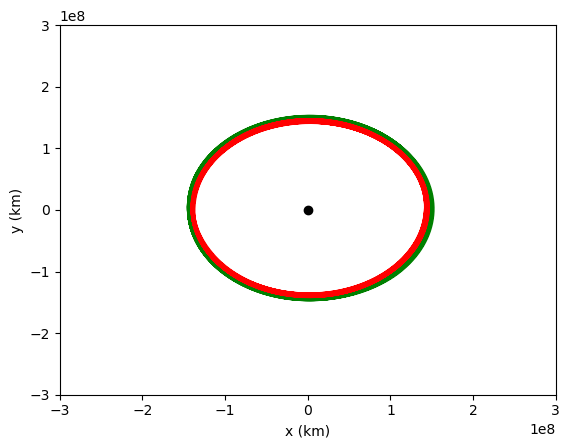

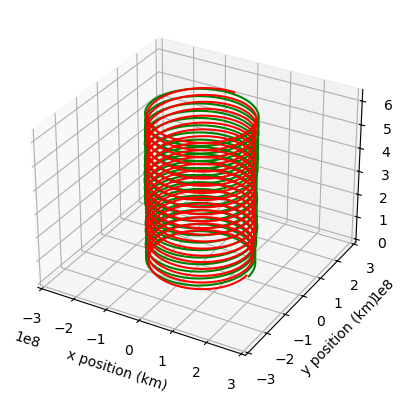

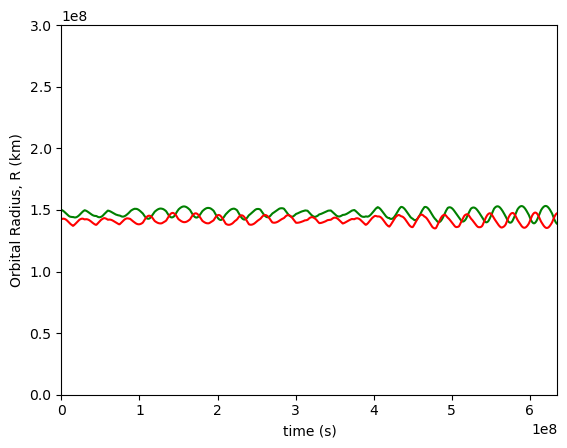

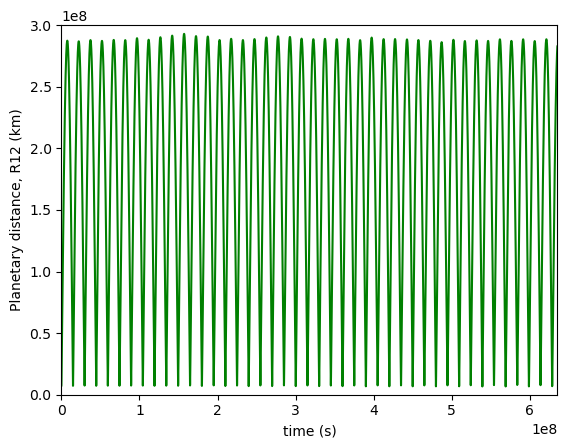

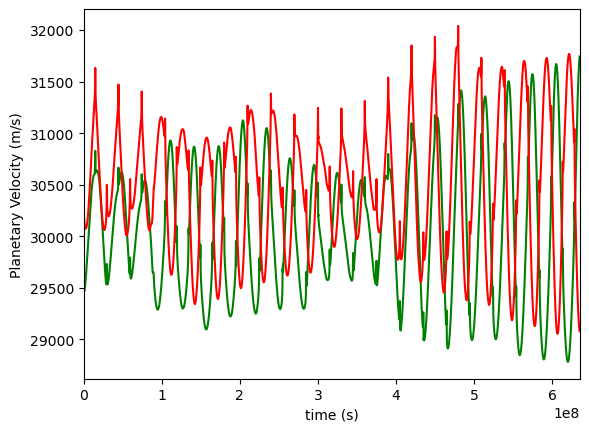

In [6]:
orbit_sol1 = solve_ivp(orbit, [t0, tmax], case1, method='DOP853', t_eval=t)
show(orbit_sol1)

Animation saved.


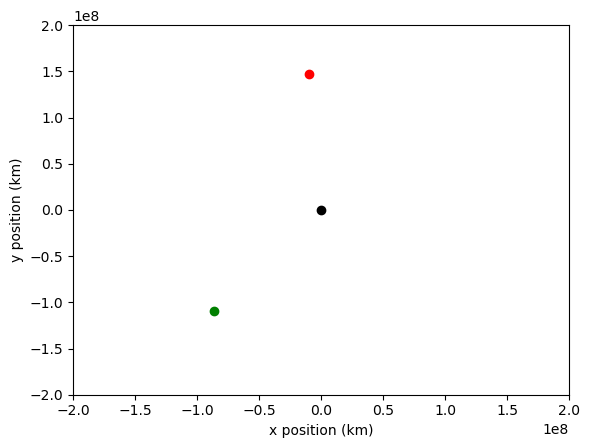

In [25]:
fig = plt.figure()
ax = fig.subplots()
plt.axis( [-2e8, 2e8, -2e8, 2e8] )
plt.plot(0,0, 'ko', lw=2)
ax.set_xlabel('x position (km)')
ax.set_ylabel('y position (km)') 

line1, = ax.plot([],[], 'go', lw=2)
line2, = ax.plot([],[], 'ro', lw=2)

def init():
    line1.set_data([],[])
    line2.set_data([],[])
    return (line1,line2)
    
N = 1764641
Nframes = 800
Nskip = int(N/Nframes)

def animate(i):
    if i < len(orbit_sol1.t):
        xp1 = orbit_sol1.y[0][i * Nskip] / 1000
        yp1 = orbit_sol1.y[1][i * Nskip] / 1000
        xp2 = orbit_sol1.y[2][i * Nskip] / 1000
        yp2 = orbit_sol1.y[3][i * Nskip] / 1000
        line1.set_data([xp1], [yp1])
        line2.set_data([xp2], [yp2])
    return line1, line2

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=Nframes, interval=100, blit=True)
f = "planetanimation1.gif"
writergif = animation.PillowWriter(fps=30)
anim.save(f, writer=writergif)
print("Animation saved.")

## 2) 

In [16]:
mp1 =  ms * 0.001 #kg
mp2 =   mp1 * 0.01 #kg
rp1 = re 
rp2 = re * 1.001
pp1 = np.sqrt(k * (rp1**3)) #s
pp2 = np.sqrt(k * (rp2**3)) #s
vp1 = (2*np.pi * rp1)/pp1
vp2 = (2*np.pi * rp2)/pp2
case2 = np.zeros((8))
case2[0] = rp1
case2[1] = 0
case2[2] = rp2 * 1.001
case2[3] = 0
case2[4] = 0
case2[5] = -vp1
case2[6] = 0
case2[7] = -2.11 * vp1

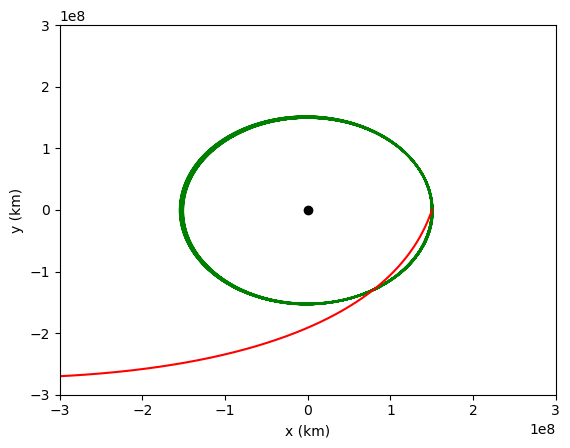

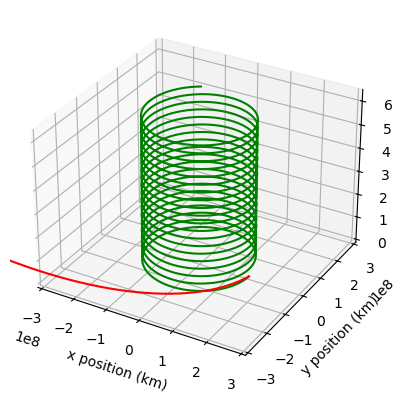

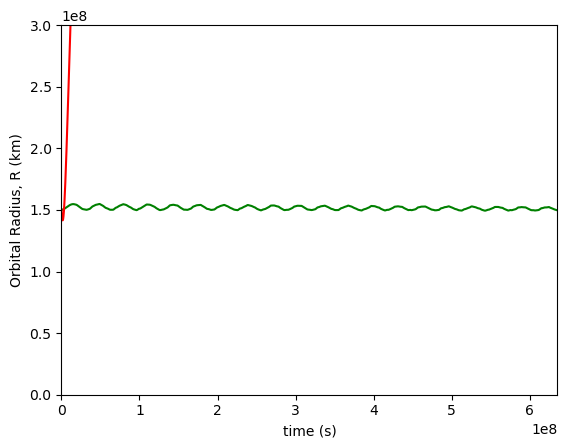

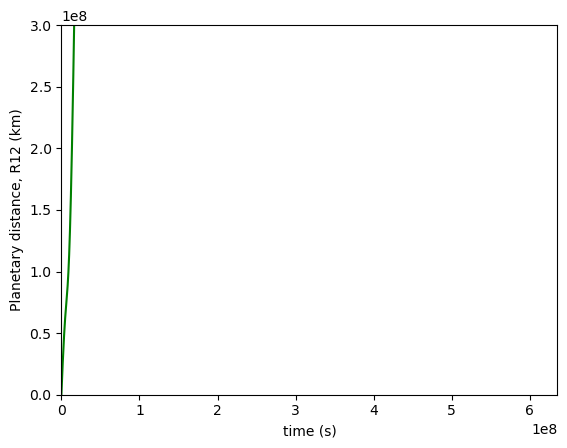

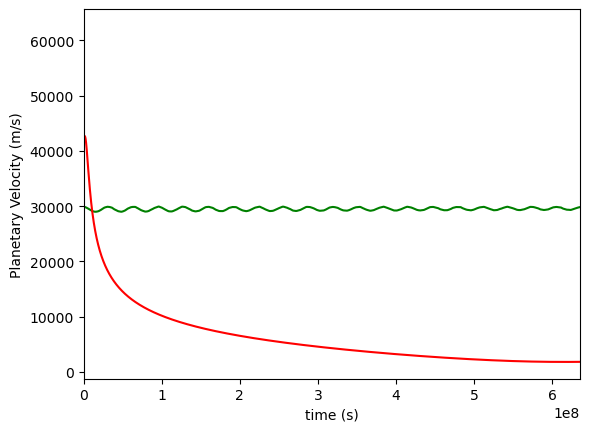

In [17]:
orbit_sol2 = solve_ivp(orbit, [t0, tmax], case2, method='DOP853', t_eval=t)
show(orbit_sol2)

In [ ]:
fig = plt.figure()
ax = fig.subplots()
plt.axis( [-2e8, 2e8, -2e8, 2e8] )
plt.plot(0,0, 'ko', lw=2)
ax.set_xlabel('x position (km)')
ax.set_ylabel('y position (km)') 

line1, = ax.plot([],[], 'go', lw=2)
line2, = ax.plot([],[], 'ro', lw=2)

def animate2(i):
    if i < len(orbit_sol2.t):
        xp1 = orbit_sol2.y[0][i * Nskip] / 1000
        yp1 = orbit_sol2.y[1][i * Nskip] / 1000
        xp2 = orbit_sol2.y[2][i * Nskip] / 1000
        yp2 = orbit_sol2.y[3][i * Nskip] / 1000
        line1.set_data([xp1], [yp1])
        line2.set_data([xp2], [yp2])
    return line1, line2


anim2 = animation.FuncAnimation(fig, animate2, init_func=init, frames=Nframes, interval=100, blit=True)
f = "planetanimation2.gif"
anim2.save(f, writer=writergif)
print("Animation saved.")

## 3)

In [20]:
mp1 =  ms * 0.90 #kg
mp2 =   mp1 * 0.1 #kg
rp1 = re * 0.6
rp2 = re * 0.5
pp1 = np.sqrt(k * (rp1**3)) #s
pp2 = np.sqrt(k * (rp2**3)) #s
vp1 = (2*np.pi * rp1)/pp1
vp2 = (2*np.pi * rp2)/pp2

case3 = np.zeros((8))
case3[0] = rp1
case3[1] = 0
case3[2] = rp2 * 1.001
case3[3] = 0
case3[4] = 0
case3[5] = vp1
case3[6] = 0
case3[7] = -2* vp1

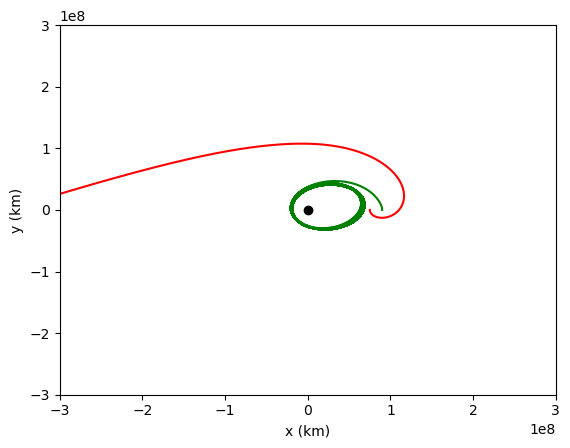

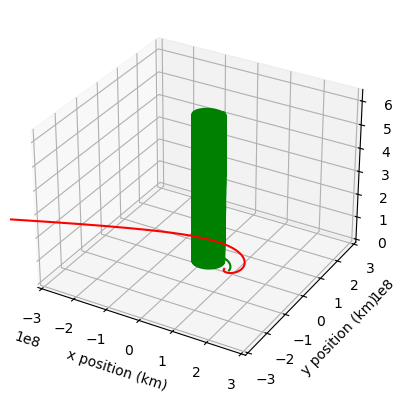

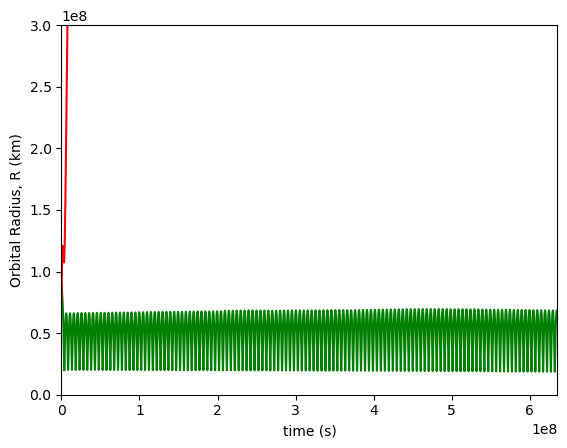

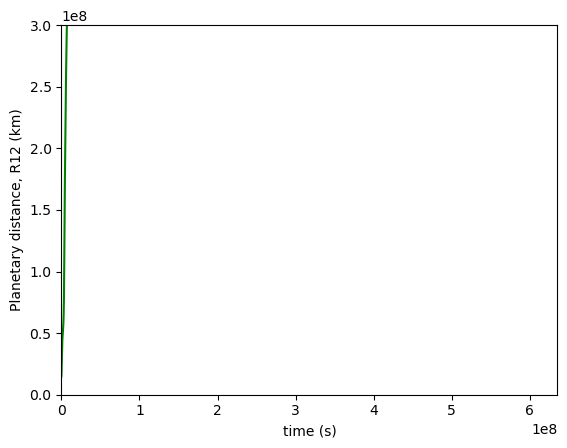

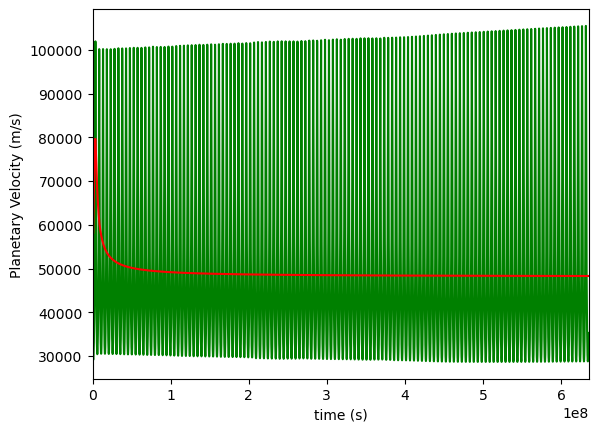

In [21]:
orbit_sol3 = solve_ivp(orbit, [t0, tmax], case3, method='DOP853', t_eval=t)
show(orbit_sol3)

In [ ]:
fig = plt.figure()
ax = fig.subplots()
plt.axis( [-2e8, 2e8, -2e8, 2e8] )
plt.plot(0,0, 'ko', lw=2)
ax.set_xlabel('x position (km)')
ax.set_ylabel('y position (km)') 

line1, = ax.plot([],[], 'go', lw=2)
line2, = ax.plot([],[], 'ro', lw=2)

def animate3(i):
    if i < len(orbit_sol2.t):
        xp1 = orbit_sol3.y[0][i * Nskip] / 1000
        yp1 = orbit_sol3.y[1][i * Nskip] / 1000
        xp2 = orbit_sol3.y[2][i * Nskip] / 1000
        yp2 = orbit_sol3.y[3][i * Nskip] / 1000
        line1.set_data([xp1], [yp1])
        line2.set_data([xp2], [yp2])
    return line1, line2


anim3 = animation.FuncAnimation(fig, animate3, init_func=init, frames=Nframes, interval=100, blit=True)
f = "planetanimation3.gif"
anim3.save(f, writer=writergif)
print("Animation saved.")